In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
new=pd.read_csv('20년도 서울창업폐업/네이버뉴스_서울_창업_20200501_20200531.csv',encoding='utf8')
new

,Unnamed: 0,date,title,contents
0,0,2020.05.26.,"서울시, 소상공인 재기 돕는다…800곳에 200만원 지원","시는 폐업을 준비하고 있는 소상공인·자영업자들에게 재창업을 위한 컨설팅, 일자리 알..."
1,1,2020.05.25.,"서울국세청, 소상공인･전통시장 전용 무료세무상담창구 운영",또한 공단 주관 창업･재기 교육과정과 서울국세청 주관 납세자세법교실에 상대 기관의 ...
2,2,2020.05.27.,"서울시 자영업자 생존자금, 대상자 알아보기",1 이전 창업자) ▼ 신청일 기준 실제 영업중인 소상공인- 현재 휴·폐업 중이거나 ...
3,3,2020.05.25.,"'서울시 자영업자 생존자금' Q&A, 개인택시·화물자동차도 지원대상인가요?","이전 창업자), 지급 신청일 기준 실제 영업중인 소상공인(현재 휴·폐업 중이거나 사..."
4,4,2020.05.25.,"""서울시 자영업자 생존자금 지원 기준 완화해달라"" 민원 쇄도",/ 서울시 서울시가 신종 코로나바이러스 감염증(코로나19) 사태로 폐업 위기에 몰린...
...,...,...,...,...
173,173,2020.05.27.,"공유주방 키친42, 300개 지점 개설로 일자리 1만 개 창출 계획",창업의 허들을 낮추고 폐업으로 인한 매몰 비용을 줄이는 데 매우 효과적이다. 더불어...
174,174,2020.05.11.,[사람이 답이다] “안전관리로 의료·화학연구 발전 이끌 터”,결단이 선 김 대표는 회사를 그만두고 마음이 잘 맞는 친구 2명과 함께 서울 행당동...
175,175,2020.05.26.,"위기가 기회, 트렌드 맞는 창업전략 필요","상가정보연구소에 따르면 지난 3월 권리금이 있는 상가 비율은 원주 43.3%, 울산..."
176,176,2020.05.17.,"당정청 ""골목형 상점가 지정기준·표준계약서 보급 확대"" 등 공정경제 제도개...",조성욱 공정거래위원장이 15일 오전 서울 여의도 국회 의원회관에서 열린 제7차 당·...


In [8]:
title=new['title']
title

0                     서울시, 소상공인 재기 돕는다…800곳에 200만원 지원
1                     서울국세청, 소상공인･전통시장 전용 무료세무상담창구 운영
2                             서울시 자영업자 생존자금, 대상자 알아보기
3           '서울시 자영업자 생존자금' Q&A, 개인택시·화물자동차도 지원대상인가요?
4                   "서울시 자영업자 생존자금 지원 기준 완화해달라" 민원 쇄도
                            ...                      
173             공유주방 키친42, 300개 지점 개설로 일자리 1만 개 창출 계획
174                 [사람이 답이다] “안전관리로 의료·화학연구 발전 이끌 터”
175                            위기가 기회, 트렌드 맞는 창업전략 필요
176      당정청 "골목형 상점가 지정기준·표준계약서 보급 확대" 등 공정경제 제도개...
177    “삼성 박차고 나와 3년만에 260곳 투자” 스타트업에 빠진 김용민 인라이트벤...
Name: title, Length: 178, dtype: object

In [9]:
title.to_csv('news_title.txt',index=False, header=False)

In [10]:
nt=open('news_title.txt',"r", encoding='utf-8')
text = nt.read()
text

'"서울시, 소상공인 재기 돕는다…800곳에 200만원 지원"\n"서울국세청, 소상공인･전통시장 전용 무료세무상담창구 운영"\n"서울시 자영업자 생존자금, 대상자 알아보기"\n"\'서울시 자영업자 생존자금\' Q&A, 개인택시·화물자동차도 지원대상인가요?"\n"""서울시 자영업자 생존자금 지원 기준 완화해달라"" 민원 쇄도"\n[서울시 자영업자 생존자금신청] A부터 Z까지 총정리!\xa0\n"서울시 소재 당구장, 서울시 자영업자 생존자금 신청 가능"\n"서울시 용산구, 코로나19 피해 자영업자 생존자금 지원… 25일부터온라인 신청..."\n경기 악화에 코로나쇼크까지...서울 휴게음식점 절반 3년내 문 닫았다\n"서울 휴게음식점, 절반 이상이 3년 내 문 닫아"\n"서울 휴게음식점 절반, 3년 못 버티고 문 닫았다"\n"서울 휴게음식점 절반, 3년 내 문 닫았다"\n코로나로 실직·폐업 도시 구직자에 농업 일자리 연계\n이스타 인수 지지부진… 제주항공 또 다른 이유 있나\n"""폐업도 돈 있어야""…가게 문 열고 한숨만"\n[Who Is ?] 김기문 중소기업중앙회 회장\n"[파워리포트] 21대 경기지역 국회의원 59인, 608개 대표공약 리스트"\n"금천구, 자영업자 생존자금 지원 총력"\n"[special] 전문가 직설좌담, 포스트 코로나 투자 시계는"\n"정부, 사법부에 산재사고 처벌 강화 요청"\n"""폐업도 돈 있어야…"" 가게 문 열어놓고 한숨만"\n"코로나19로 드러난 사회문제, 소셜벤처가 해결한다면?"\n"피어리스화장품 창업주 장남, \'스킨푸드\' 조윤호 전 대표의 몰락"\n코로나로 실직한 특고·프리랜서에 직접일자리·구직알선 제공\n"1인소자본 커피 프렌차이즈 \'디저트39\', 카페창업 아이템으로 체인점주와 상생"\n"금천구, 자영업자 \'생존자금\' 지원"\n[밀착카메라] 코로나 불황에 줄폐업…갈 곳 잃은 \'재고\'\n"용산구, 코로나19 피해 자영업자 생존자금 지원"\n"송파구, 소상공인 종합지원 상담센터 운영…정책 안내"\n"공유주방 키친4

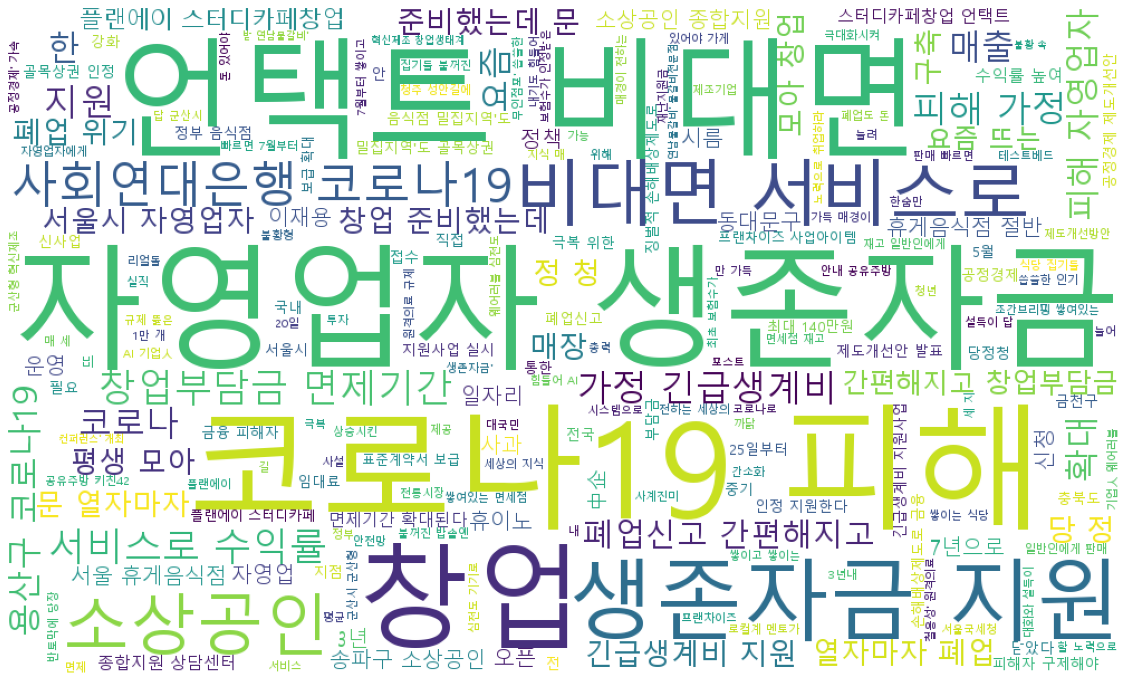

In [11]:
wc= WordCloud(width=1000,height=600, background_color='white',font_path=("c:/Windows/Fonts/malgun.ttf")).generate(text)
plt.figure(figsize=(20,15))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [12]:
new=pd.read_csv('20년도 서울창업폐업/네이버뉴스_서울_창업_20200601_20200630.csv',encoding='utf8')
new

,Unnamed: 0,date,title,contents
0,0,2020.06.18.,"서울 프랜차이즈 브랜드 5개 중 1곳, 3년도 못가 문 닫았다",서울에 문을 여는 프랜차이즈 브랜드 5개 중 1개는 3년 안에 폐업하는 것으로 나타...
1,1,2020.06.18.,서울 프랜차이즈 분석해보니…외식업 20% 개업 3년 후 폐업,지나면 폐업하는 것으로 나타났다. 서울시가 18일 발표한 '2019년 프랜차이즈 분...
2,2,2020.06.20.,서울 프랜차이즈 외식업 3년내 브랜드 10곳중 2곳은 사라져,━ ◆ 도소매업 생존율 높고 외식업은 3년 후 10곳 중 2곳 이상 폐업 ━ 브랜드...
3,3,2020.06.22.,"서울시 자영업자 긴급재난지원금, 이달 30일까지 방문신청",소재지가 서울이어야 한다. 대표자 주소지와는 관계없다. 2019년도 9월 1일 이전...
4,4,2020.06.19.,서울 프랜차이즈 창업비 1.3억… 외식업 3년내 20% 문 닫아,외식업 브랜드는 창업 후 3년이 지나면 10곳 중 2곳 이상 폐업하는 것으로 나타났...
...,...,...,...,...
154,154,2020.06.04.,결국 현실된 '굿바이 싸이월드',"국세청, 5월26일자로 싸이월드 직권 폐업 전제완 대표는 과기부에 ""폐업의사 없다""..."
155,155,2020.06.02.,'가성비'로 365일 불야성…중박은 족히 가능한 상권,2080 다 모이는 강북 전통 상권 수유역 지난 22일 오후 서울 강북구 지하철 4...
156,156,2020.06.03.,[3차 추경] 지역·골목상권 살리는데 3조원 투입… 언택트 육성에 7000억원,아울러 폐업 위기 소상공인의 재기를 위해 1차 추경 8200명 지원(164억원)에 ...
157,157,2020.06.10.,[6월 2주 미디어동향] 전세계 슈퍼챗 1위 한국의 '가세연'外,■ [신문윤리위원회]가 현대자동차와 KT를 비판한 광주일보ㆍ스포츠서울 기사에 주의 ...


In [13]:
title=new['title']
title

0               서울 프랜차이즈 브랜드 5개 중 1곳, 3년도 못가 문 닫았다
1                서울 프랜차이즈 분석해보니…외식업 20% 개업 3년 후 폐업
2                서울 프랜차이즈 외식업 3년내 브랜드 10곳중 2곳은 사라져
3                  서울시 자영업자 긴급재난지원금, 이달 30일까지 방문신청
4              서울 프랜차이즈 창업비 1.3억… 외식업 3년내 20% 문 닫아
                          ...                     
154                              결국 현실된 '굿바이 싸이월드'
155                  '가성비'로 365일 불야성…중박은 족히 가능한 상권
156    [3차 추경] 지역·골목상권 살리는데 3조원 투입… 언택트 육성에 7000억원
157            [6월 2주 미디어동향] 전세계 슈퍼챗 1위 한국의 '가세연'外
158                        도시민대상 농업 일자리 연계 단기 귀농교육
Name: title, Length: 159, dtype: object

In [14]:
title.to_csv('news_title2.txt',index=False, header=False)

In [15]:
nt=open('news_title2.txt',"r", encoding='utf-8')
text2 = nt.read()

'"서울 프랜차이즈 브랜드 5개 중 1곳, 3년도 못가 문 닫았다"\n서울 프랜차이즈 분석해보니…외식업 20% 개업 3년 후 폐업\n서울 프랜차이즈 외식업 3년내 브랜드 10곳중 2곳은 사라져\n"서울시 자영업자 긴급재난지원금, 이달 30일까지 방문신청"\n서울 프랜차이즈 창업비 1.3억… 외식업 3년내 20% 문 닫아\n서울시 자영업자 생존자금 46만명 신청…예상치 훌쩍 초과\n강경 젓갈 만들고 금산 전통주 빚는 서울 청춘들\n"대기업 협력사도 결국 폐업···""공장 해외이전 안한 것 뼈저리게 후회"""\n"뜨뜻미지근 제주항공… 이스타항공, M&A 무산 시 파산"\n"치킨프랜차이즈 ""이춘봉인생치킨"" 서울 왕십리점 점주의 창업 인터뷰"\n"[단독] ‘싸이월드’ 폐업 사태, 결국 국회로 간다! [IT선빵!]"\n"돼지고기무한리필 프랜차이즈 \'통큰갈비\', 서울 대학로점 점주의 업종변경 창..."\n"[홍준표 칼럼] 퇴직 후 20년, 정말 원하는 일을 하려면..."\n車 개소세 연말까지 30% 인하...눈·흉부 초음파 건보 적용도\n최저임금 후폭풍···대기업 우수협력사도 폐업\n"""의사가 랜선 진료""…재외국민 \'비대면 진료\' 길 열렸다"\n"“위기는 기회다” 에듀바비, 눈에띄는 성장세 돋보여"\n"국회 태업에 \'을\'들이 화났다 ""3차 추경 언제할거냐"""\n"1인 소자본 청년 창업 욜로PC방, 폐업률 0% 기록"\n코로나19로 길어지는 여행·관광업 \'보릿고개\'\n"이영자 맛집도 문 닫았다, 신경안정제 먹는 상인들"\n"원격의료, 재외국민 대상 3분기부터 서비스 시작"\n재외국민 비대면진료서비스 승인\n[Interview] 이재성 취업 멘토링 스타트업 ‘코멘토’ 대표 | “직업 환상 깨...\n1999년생 싸이월드의 ‘한달 시한부’… 이제는 진짜 안녕\n"대은산업, 자동 PP 밴드 국내 1위 제조사…전체 매출서 수출이 70%"\n"檢, \'삼성노조 와해\' 의혹 삼성 임직원에 2심서도 실형 구형"\n"벤처업계·소상공인 국회에 ""3차 추경안 조

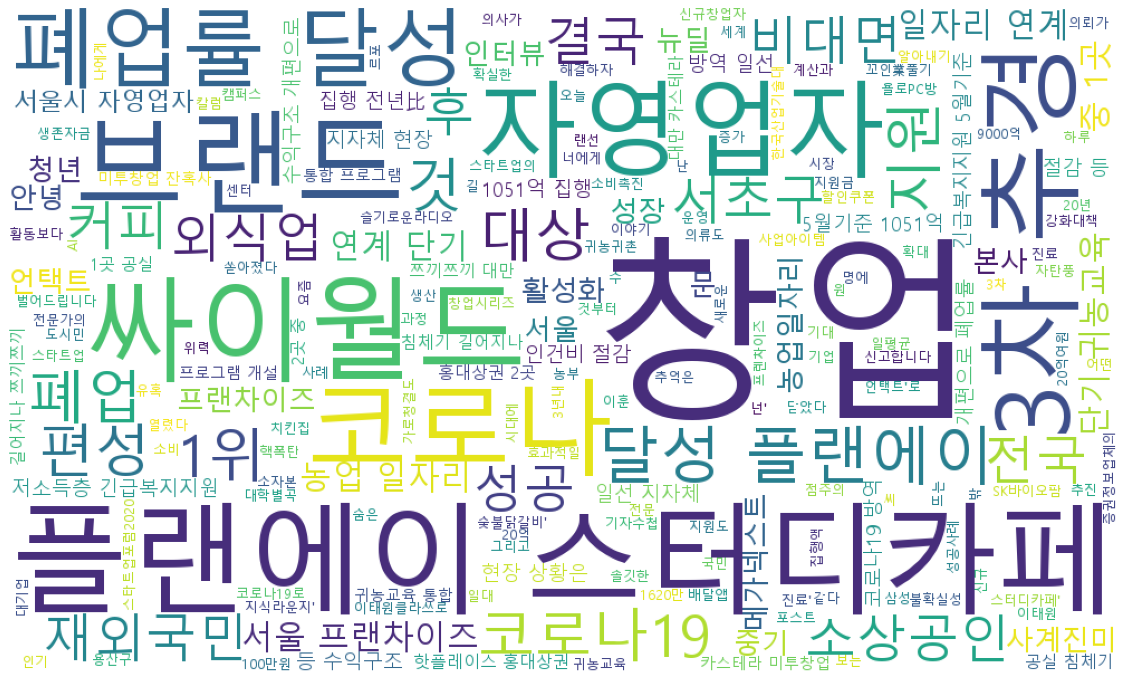

In [17]:
wc= WordCloud(width=1000,height=600, background_color='white',font_path=("c:/Windows/Fonts/malgun.ttf")).generate(text2)
plt.figure(figsize=(20,15))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [25]:
new=pd.read_csv('20년도 서울상권/네이버뉴스_서울_상권_20200601_20200630.csv',encoding='utf8')
title=new['title']
title.to_csv('news_title3.txt',index=False, header=False)
nt=open('news_title3.txt',"r", encoding='utf-8')
text3 = nt.read()

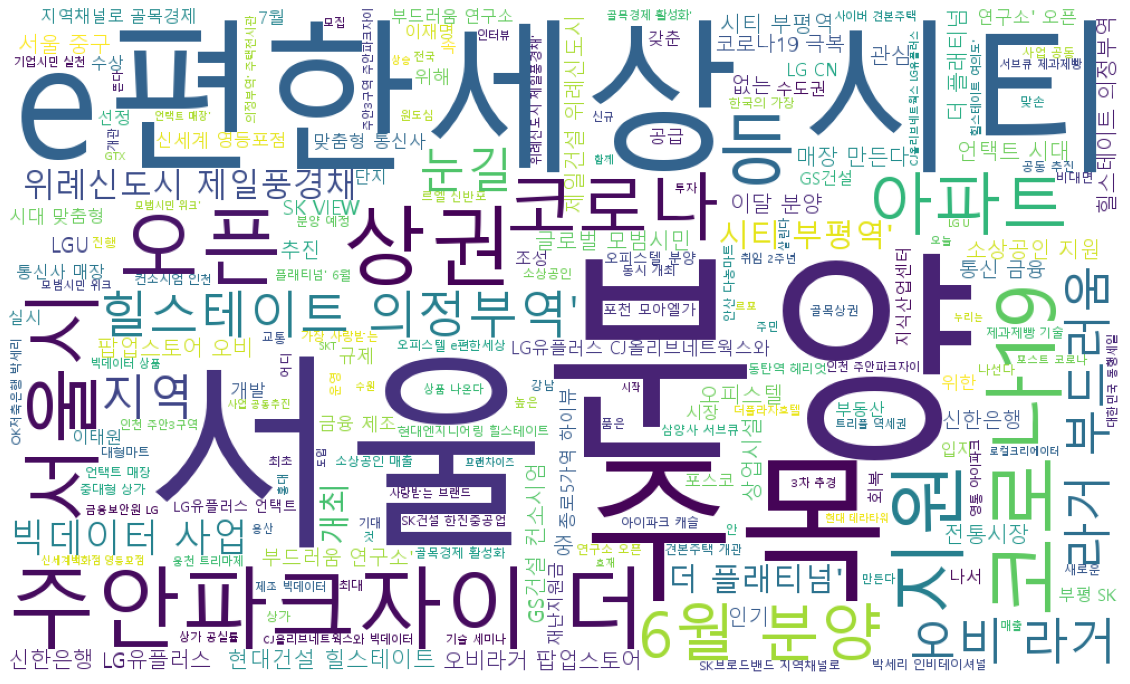

In [26]:
wc= WordCloud(width=1000,height=600, background_color='white',font_path=("c:/Windows/Fonts/malgun.ttf")).generate(text3)
plt.figure(figsize=(20,15))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [2]:
new=pd.read_csv('뉴스긍정부정.csv')
new

,data,label
0,16.01,1
1,16.02,0
2,16.03,1
3,16.04,1
4,16.05,1
...,...,...
66,21.07,0
67,21.08,0
68,21.09,0
69,21.10,0


In [5]:
new.tail(12)

,data,label
59,20.12,1
60,21.01,1
61,21.02,1
62,21.03,1
63,21.04,0
64,21.05,1
65,21.06,1
66,21.07,0
67,21.08,0
68,21.09,0
